# Data Collection and cleaning 
### Assignment 1

For the data retrieval, I utlized "pybliometrics" Python-based API-Wrapper to access and reteive information from "Scopus." Scopus is a comprehensive, multidisciplinary, trusted abstract and citation database created by Elsevier.
https://pybliometrics.readthedocs.io/en/stable/index.html

Using instituational VPN access, I was able to query documents that contained the following words in either the the Title, Abstract or Keyword list:
- Indigenous Peoples
- Native American
- First Nations
- Aboriginal

The query was also limited to certain subject areas broadly within the field of "science":
- Social Sciences
- Medicine
- Environmental Science
- Agricultural and Biological Sciences
- Earth and Planetary Sciences
- Engineering
- Multidisciplinary
- Computer Science
- Pharmacology, Toxicology and Pharmaceutics
- Energy
- Decision Sciences
- Chemical Engineering
- Materials Science
- Physics and Astronomy
- Mathematics
- Chemistry
- Neuroscience

The region of publication was limited to United States, Australia and Canada. This was specifically to limit article publication from to the major countries of active settler colonialism. 

The query was also limited to articles, book chapters and conference papers. 

The last filter applied was to the year with an upper limit of 2023. 

The total dataset contained 39323 elements.

In [295]:
from pybliometrics.scopus import ScopusSearch
import pandas as pd

q = ( TITLE-ABS-KEY ( "Indigenous peoples" ) OR TITLE-ABS-KEY ( "First Nations" ) OR TITLE-ABS-KEY ( "Native American" )OR TITLE-ABS-KEY ( aboriginal ) ) AND ( LIMIT-TO ( DOCTYPE , "ar" ) OR LIMIT-TO ( DOCTYPE , "ch" ) OR LIMIT-TO ( DOCTYPE , "cp" ) ) AND ( LIMIT-TO ( SUBJAREA , "SOCI" ) OR LIMIT-TO ( SUBJAREA , "MEDI" ) OR LIMIT-TO ( SUBJAREA , "ENVI" ) OR LIMIT-TO ( SUBJAREA , "AGRI" ) OR LIMIT-TO ( SUBJAREA , "EART" ) OR LIMIT-TO ( SUBJAREA , "BIOC" ) OR LIMIT-TO ( SUBJAREA , "ENGI" ) OR LIMIT-TO ( SUBJAREA , "MULT" ) OR LIMIT-TO ( SUBJAREA , "COMP" ) OR LIMIT-TO ( SUBJAREA , "PHAR" ) OR LIMIT-TO ( SUBJAREA , "ENER" ) OR LIMIT-TO ( SUBJAREA , "DECI" ) OR LIMIT-TO ( SUBJAREA , "CENG" ) OR LIMIT-TO ( SUBJAREA , "MATE" ) OR LIMIT-TO ( SUBJAREA , "PHYS" ) OR LIMIT-TO ( SUBJAREA , "MATH" ) OR LIMIT-TO ( SUBJAREA , "CHEM" ) OR LIMIT-TO ( SUBJAREA , "NEUR" ) )"
s = ScopusSearch(q, verbose=True)
df = pd.DataFrame(pd.DataFrame(s.results))
df.to_csv('scopus final.csv')

In [3]:
df = pd.read_csv('scopus final.csv')

df = df.drop(['Unnamed: 0','index'], axis=1) #cleaning columns

len(df)

39323

In [4]:
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Texts,Publisher,Document Type,Open Access,Source
0,Brown D.,"Brown, David (58731200000)",58731200000,Community sanctions in Australia: Engaging sta...,2023,"Punishment, Probation and Parole: Mapping out ...",NaN,NaN,NaN,185,...,"Brown D., Faculty of Law and Justice, Universi...",This chapter provides a brief overview of comm...,Agonistic politics; Indigenous governance; Ind...,NaN,NaN,NaN,Emerald Group Publishing Ltd.,Book chapter,NaN,Scopus
1,Eer A.S.Y.; Ho R.C.Y.; Hearn T.; Hachem M.; Fr...,"Eer, Audrey Sing Yi (35114667600); Ho, Rebecca...",35114667600; 58750511100; 57765845800; 5719385...,Feasibility and acceptability of the use of fl...,2023,BMC Health Services Research,23,1,1377,NaN,...,"Eer A.S.Y., Austin Health, Heidelberg, VIC, Au...",Background: Type 2 diabetes mellitus (T2DM) is...,Aboriginal people; Flash glucose monitoring; I...,Australia; Australians; Blood Glucose; Blood G...,Medical Research Future Fund; Melbourne Academ...,This pilot study was funded from grants for th...,BioMed Central Ltd,Article,All Open Access; Gold Open Access,Scopus
2,Sorenson M.S.; Kutz S.J.; Collicutt A.C.; Bail...,"Sorenson, Megan S. (58746327200); Kutz, Susan ...",58746327200; 7003416229; 58746230200; 58746230...,Can intake data inform on impacts of repeated ...,2023,Canadian Veterinary Journal,64,12,NaN,1149,...,"Sorenson M.S., Faculy of Veterinary Medicine, ...",Objective Subsidized dog care and population m...,NaN,Alberta; Animals; Data Collection; Dogs; Femal...,Dogs Trust,Support and funding for this project were prov...,Canadian Veterinary Medical Association,Article,NaN,Scopus
3,Dadi A.F.; He V.; Nutton G.; Su J.-Y.; Guthrid...,"Dadi, Abel Fekadu (57031690900); He, Vincent (...",57031690900; 55964081300; 55752423400; 2347861...,Predicting child development and school readin...,2023,PLoS ONE,18,12 December,e0296051,NaN,...,"Dadi A.F., Menzies School of Health Research, ...",Background Positive early development is criti...,NaN,"Child Development; Child, Preschool; Female; H...",Attorney General and Justice; Chief Minister a...,The study was supported by a grant from the No...,Public Library of Science,Article,All Open Access; Gold Open Access; Green Open ...,Scopus
4,Liu A.; Gilani S.,"Liu, Amy (58700086800); Gilani, Sapideh (56406...",58700086800; 56406972100,Parathyroidectomy outcomes for Asians in the U...,2023,Surgery Open Science,16,NaN,NaN,192,...,"Liu A., University of California, San Diego Me...",Introduction: Outcomes for Asian patients in t...,Asian; Complications; Disparities; Hispanic; O...,adult; American Indian; Article; Asian; Black ...,NaN,NaN,Elsevier B.V.,Article,All Open Access; Gold Open Access,Scopus


In [5]:
len(df)

39323

In [6]:
df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Funding Details', 'Funding Texts', 'Publisher',
       'Document Type', 'Open Access', 'Source'],
      dtype='object')

# Result Replication
### Assignment 2
Here I am replicating analysis similar to that of Evolution and structure of sustainability science- including general descriptive statistics regarding growth of field, funders and publishers of the feild and common keyword evalution via word cloud

## Temporal Evolution

In [30]:
df.dropna(subset=['Year'], inplace=True)
counts_per_year = df.groupby('Year').size()

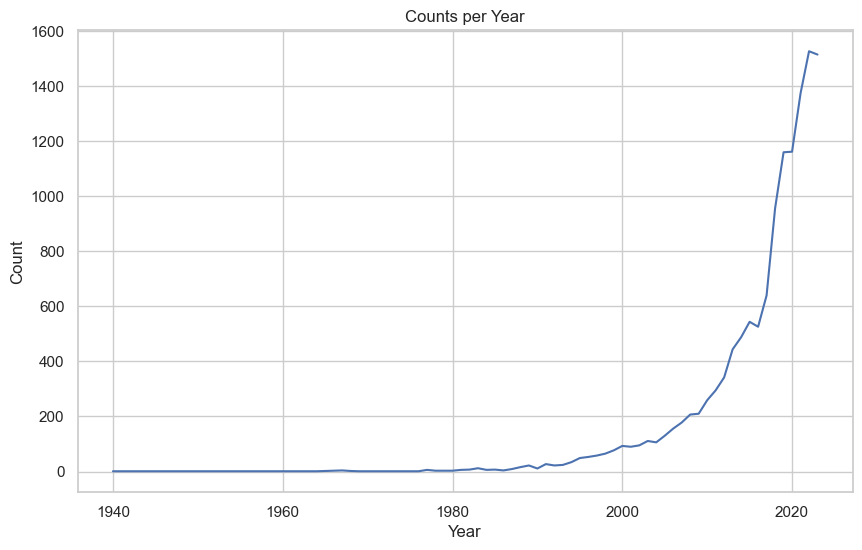

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.lineplot(data=counts_per_year)

plt.title('Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Venues of Publication

In [33]:
df.dropna(subset=['Source title'], inplace=True)
source_title = df.groupby('Source title').size().sort_values(ascending=False)

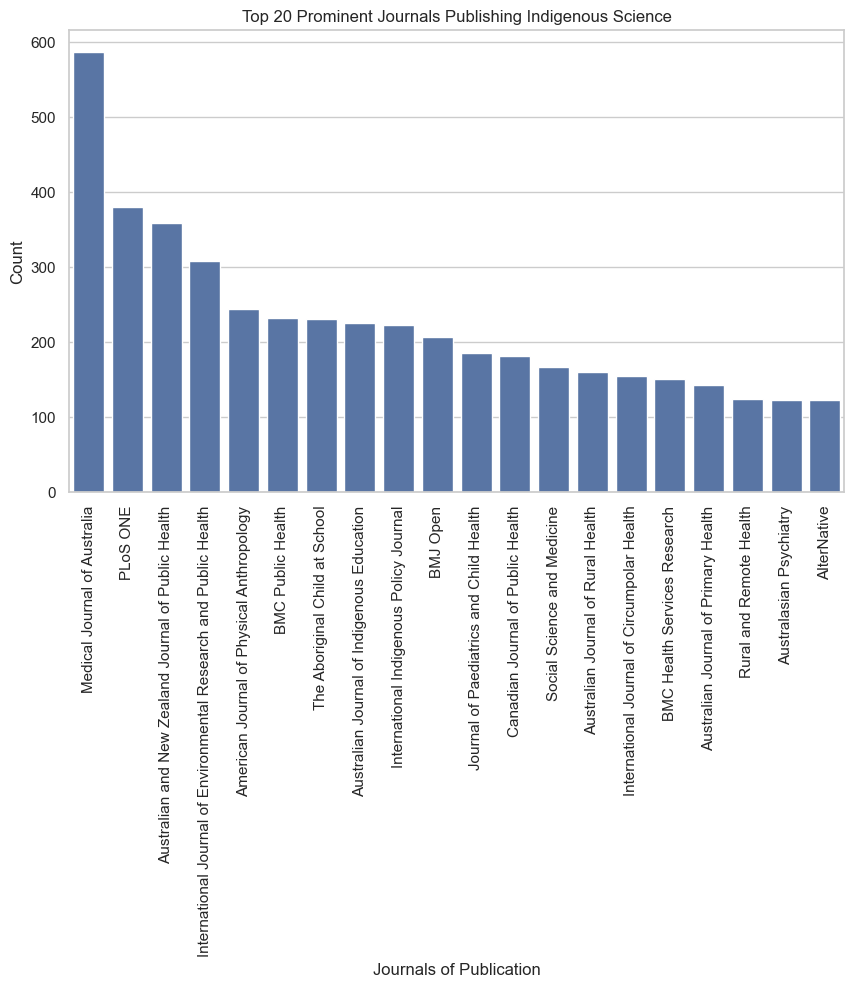

In [34]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(source_title.index)[0:20], y=list(source_title.values)[0:20])
plt.xticks(rotation=90)

plt.xlabel('Journals of Publication')
plt.ylabel('Count')
plt.title('Top 20 Prominent Journals Publishing Indigenous Science')

plt.show()

## Venues of Funding

In [24]:
df.dropna(subset=['Funding Details'], inplace=True)
funding = df.groupby('Funding Details').size().sort_values(ascending=False)

In [25]:
funding

Funding Details
Social Sciences and Humanities Research Council of Canada, SSHRC                                                                            211
Australian Research Council, ARC                                                                                                             71
National Health and Medical Research Council, NHMRC                                                                                          57
Canadian Institutes of Health Research, CIHR                                                                                                 54
National Science Foundation, NSF                                                                                                             29
                                                                                                                                           ... 
Department of Education; Library Association of Alberta; National Library of Canada; University of Alberta, U of A      

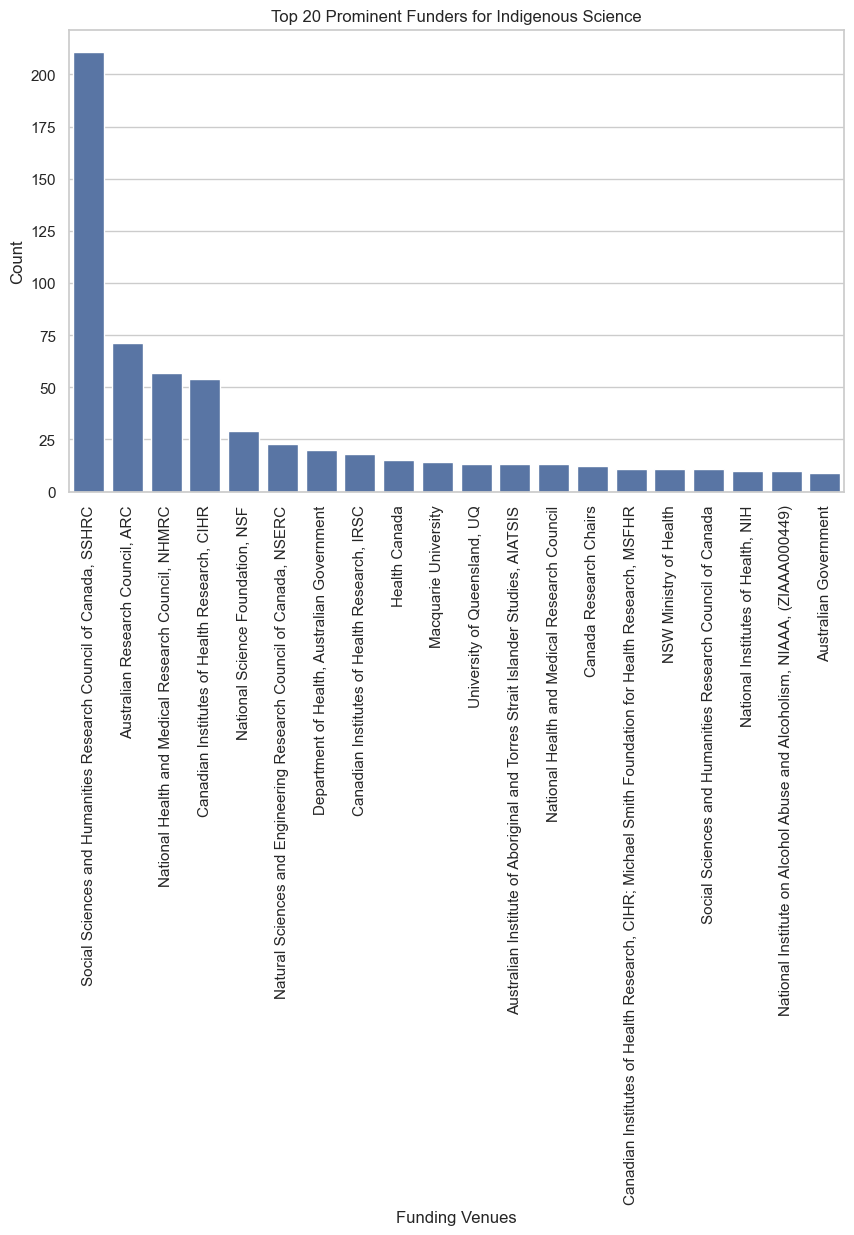

In [36]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(funding.index)[0:20], y=list(funding.values)[0:20])
plt.xticks(rotation=90)

plt.xlabel('Funding Venues')
plt.ylabel('Count')
plt.title('Top 20 Prominent Funders for Indigenous Science')

plt.show()

## Word Cloud

In [22]:
keywords = df.dropna(subset=['Author Keywords'], inplace=True)
keywords = list(df.loc[:, 'Author Keywords'])

In [55]:
keyword_list = []
i = 0
for i in range(len(keywords)):
    keyword_list.append(keywords[i].split(';'))
    i += 1

In [59]:
flat_keyword = [x for xs in keyword_list for x in xs]
new_words = [x for x in flat_keyword if not 'Indigenous' in x]
new_words1 = [x for x in new_words if not 'Aboriginal' in x]
new_words2 = [x for x in new_words1 if not 'First Nation' in x]
new_words3 = [x for x in new_words2 if not 'Native American' in x]
new_words4 = [x for x in new_words3 if not 'Canada' in x]
new_words5 = [x for x in new_words4 if not 'Australia' in x]
new_words6 = [x for x in new_words5 if not 'United States' in x]

(-0.5, 999.5, 499.5, -0.5)

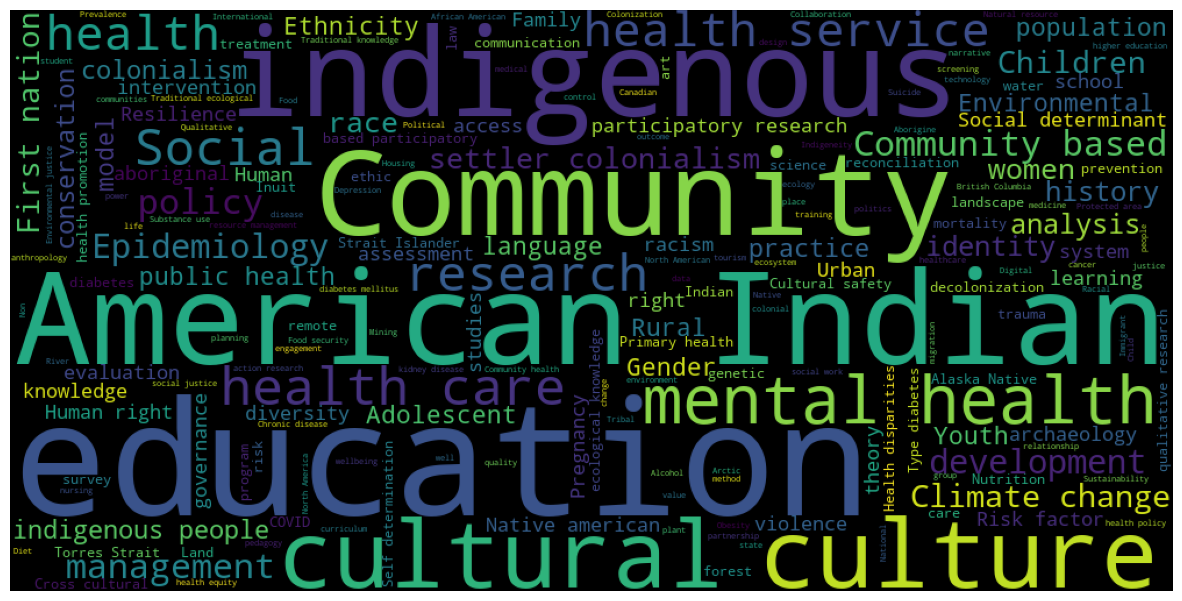

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(new_words6)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

## Topic Modeling

In [7]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
stop_words = stopwords.words('english')
def preprocess(text):
    return [token for token in simple_preprocess(text) if token not in stop_words]

df.dropna(subset=['Abstract'], inplace=True)
df['processed_abstract'] = df['Abstract'].apply(preprocess)

dictionary = Dictionary(df['processed_abstract'])
corpus = [dictionary.doc2bow(title) for title in df['processed_abstract']]

In [9]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

coherence_model_lda = CoherenceModel(model=lda_model, texts=df['processed_abstract'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Topic 0: 0.021*"indigenous" + 0.008*"aboriginal" + 0.007*"peoples" + 0.006*"rights" + 0.006*"cultural" + 0.006*"people" + 0.005*"social" + 0.005*"article" + 0.005*"paper" + 0.004*"research"
Topic 1: 0.025*"native" + 0.024*"american" + 0.009*"students" + 0.009*"americans" + 0.008*"among" + 0.008*"use" + 0.007*"study" + 0.007*"ethnic" + 0.006*"groups" + 0.006*"women"
Topic 2: 0.029*"health" + 0.019*"aboriginal" + 0.013*"community" + 0.010*"care" + 0.009*"indigenous" + 0.009*"research" + 0.008*"communities" + 0.007*"services" + 0.007*"study" + 0.007*"people"
Topic 3: 0.006*"native" + 0.005*"american" + 0.005*"populations" + 0.004*"water" + 0.004*"species" + 0.004*"region" + 0.003*"human" + 0.003*"genetic" + 0.003*"population" + 0.003*"data"
Topic 4: 0.011*"aboriginal" + 0.009*"risk" + 0.008*"patients" + 0.008*"children" + 0.008*"age" + 0.008*"non" + 0.007*"years" + 0.007*"among" + 0.007*"population" + 0.007*"ci"


/Users/owner/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/owner/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/owner/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/owner/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.war

Coherence Score: 0.4856902458022212


In [10]:
import pyLDAvis.gensim_models
import gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis)

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/owner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/owner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/owner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check im

# Decade Data Filtering

In [180]:
# Convert 'date' column to DateTime type
df['Year_dt'] = pd.to_datetime(df['Year'], format='%Y')

# Filter DataFrame by decade
def filter_by_decade(df, decade):
    start_year = decade - (decade % 10)
    end_year = start_year + 9
    return df[(df['Year_dt'].dt.year >= start_year) & (df['Year_dt'].dt.year <= end_year)]

In [225]:
filtered_df = filter_by_decade(df, 2020)
filtered_df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Texts,Publisher,Document Type,Open Access,Source,Year_dt
0,Brown D.,"Brown, David (58731200000)",58731200000,Community sanctions in Australia: Engaging sta...,2023,"Punishment, Probation and Parole: Mapping out ...",NaN,NaN,NaN,185,...,This chapter provides a brief overview of comm...,Agonistic politics; Indigenous governance; Ind...,NaN,NaN,NaN,Emerald Group Publishing Ltd.,Book chapter,NaN,Scopus,2023-01-01
1,Eer A.S.Y.; Ho R.C.Y.; Hearn T.; Hachem M.; Fr...,"Eer, Audrey Sing Yi (35114667600); Ho, Rebecca...",35114667600; 58750511100; 57765845800; 5719385...,Feasibility and acceptability of the use of fl...,2023,BMC Health Services Research,23,1,1377,NaN,...,Background: Type 2 diabetes mellitus (T2DM) is...,Aboriginal people; Flash glucose monitoring; I...,Australia; Australians; Blood Glucose; Blood G...,Medical Research Future Fund; Melbourne Academ...,This pilot study was funded from grants for th...,BioMed Central Ltd,Article,All Open Access; Gold Open Access,Scopus,2023-01-01
2,Sorenson M.S.; Kutz S.J.; Collicutt A.C.; Bail...,"Sorenson, Megan S. (58746327200); Kutz, Susan ...",58746327200; 7003416229; 58746230200; 58746230...,Can intake data inform on impacts of repeated ...,2023,Canadian Veterinary Journal,64,12,NaN,1149,...,Objective Subsidized dog care and population m...,NaN,Alberta; Animals; Data Collection; Dogs; Femal...,Dogs Trust,Support and funding for this project were prov...,Canadian Veterinary Medical Association,Article,NaN,Scopus,2023-01-01
3,Dadi A.F.; He V.; Nutton G.; Su J.-Y.; Guthrid...,"Dadi, Abel Fekadu (57031690900); He, Vincent (...",57031690900; 55964081300; 55752423400; 2347861...,Predicting child development and school readin...,2023,PLoS ONE,18,12 December,e0296051,NaN,...,Background Positive early development is criti...,NaN,"Child Development; Child, Preschool; Female; H...",Attorney General and Justice; Chief Minister a...,The study was supported by a grant from the No...,Public Library of Science,Article,All Open Access; Gold Open Access; Green Open ...,Scopus,2023-01-01
4,Liu A.; Gilani S.,"Liu, Amy (58700086800); Gilani, Sapideh (56406...",58700086800; 56406972100,Parathyroidectomy outcomes for Asians in the U...,2023,Surgery Open Science,16,NaN,NaN,192,...,Introduction: Outcomes for Asian patients in t...,Asian; Complications; Disparities; Hispanic; O...,adult; American Indian; Article; Asian; Black ...,NaN,NaN,Elsevier B.V.,Article,All Open Access; Gold Open Access,Scopus,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,Halse C.; Robinson A.M.,"Halse, Christine (55972670300); Robinson, Aunt...",55972670300; 57957567900,Working with Aboriginal students,2020,Teaching Aboriginal Studies: A Practical Resou...,NaN,NaN,NaN,257,...,"It is essential that Aboriginal viewpoints, in...",NaN,NaN,NaN,NaN,Taylor and Francis,Book chapter,NaN,Scopus,2020-01-01
10444,McDermott F.; Ozanne E.,"McDermott, Fiona (55504475600); Ozanne, Elizab...",55504475600; 16027476600,Improving health and welfare services for olde...,2020,Working with Men in the Human Services,NaN,NaN,NaN,161,...,To be an older male at the present time is to ...,NaN,NaN,NaN,NaN,Taylor and Francis,Book chapter,NaN,Scopus,2020-01-01
10450,Foley G.,"Foley, Gary (56455523000)",56455523000,The Australian Labor Party and the Native Titl...,2020,Sovereign Subjects: Indigenous Sovereignty Mat...,NaN,NaN,NaN,118,...,Noel Pearson is known to some as the ‘father o...,NaN,NaN,NaN,NaN,Taylor and Francis,Book chapter,NaN,Scopus,2020-01-01
10455,Dickerson D.; Baldwin J.A.; Belcourt A.; Belon...,"Dickerson, Daniel (35299028500); Baldwin, Juli...",35299028500; 57216794888; 36987365700; 3766113...,Encompassing Cultural Contexts Within Scientif...,2020,Prevention Science,21,NaN,NaN,33,...,American Indians/Alaska Natives/Native Hawaiia..

# K-Means Clustering on Keywords by Decade

In [228]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import random 


# Example sentences
#sentences = list(df.loc[:, "Title"])

keywords = filtered_df.dropna(subset=['Source title'], inplace=True)
sentences = list(filtered_df['Source title'])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

/var/folders/5_/2tkm4xqx0273x8px021gg5x40000gn/T/ipykernel_1111/551718438.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
len(sentences)

10410

In [230]:
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

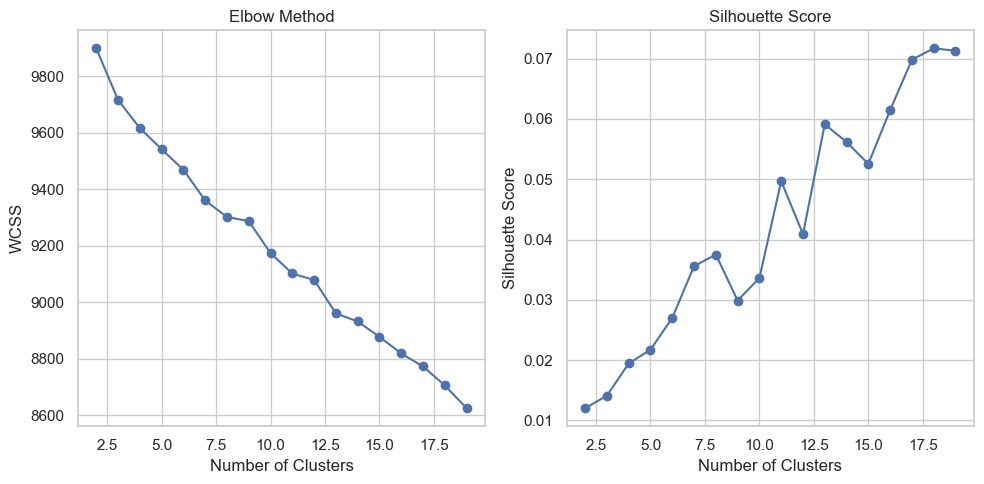

In [231]:
# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [232]:
# K-Means clustering
k = 7  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=7)

In [233]:
from sklearn.decomposition import PCA

#Dimensionality reduction
pca = PCA(n_components=3)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

# Get cluster labels
clusters = kmeans.labels_

In [234]:
import plotly.graph_objs as go

traces = []
for i in range(k):
    cluster_titles = np.array(sentences)[clusters == i]
    trace = go.Scatter3d(
        x=tfidf_matrix_reduced[clusters == i, 0],
        y=tfidf_matrix_reduced[clusters == i, 1],
        z=tfidf_matrix_reduced[clusters == i, 2],
        mode='markers',
        marker=dict(
            size=8,
            color=np.random.randn(1)[0],  # Assign a random color for each cluster
            opacity=0.8
        ),
        name=f"Cluster {i+1}",
        text=cluster_titles
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='K-Means Clustering of Article Titles (PCA)',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Plot figure
fig.show()